In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.dtypes

# Numerical, Categorical, Datetime, String, Boolean

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.isna().sum() / df.shape[0] * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

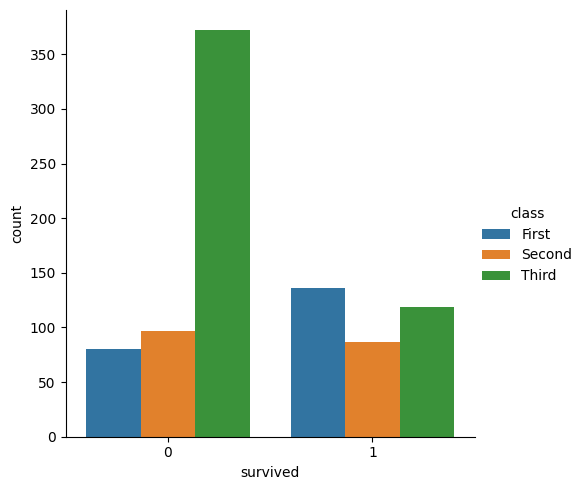

In [8]:
sns.catplot(
    data=df,
    x='survived',
    hue='class',
    kind='count',
)

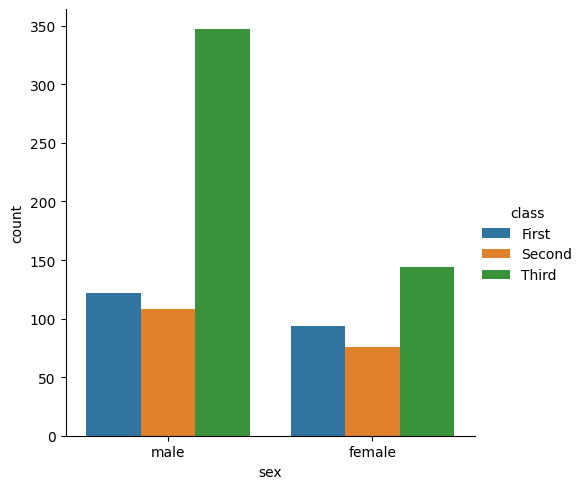

In [9]:
sns.catplot(
    data=df,
    x='sex',
    kind='count',
    hue='class',
)

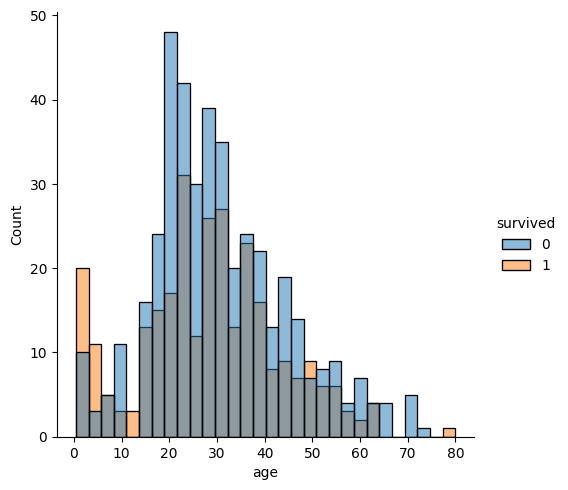

In [10]:
sns.displot(
    data=df,
    x='age',
    bins=30,
    hue='survived',
)

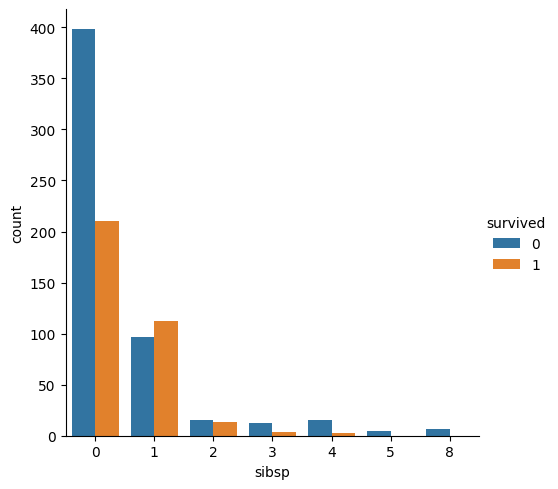

In [11]:
sns.catplot(
    data=df,
    x='sibsp',
    kind='count',
    hue='survived',
)


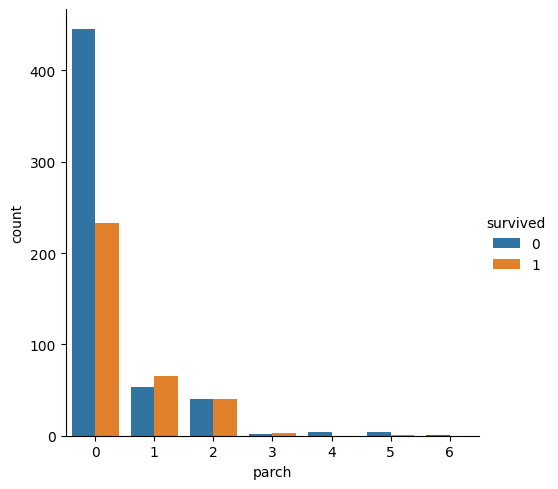

In [12]:
sns.catplot(
    data=df,
    x='parch',
    kind='count',
    hue='survived',
)

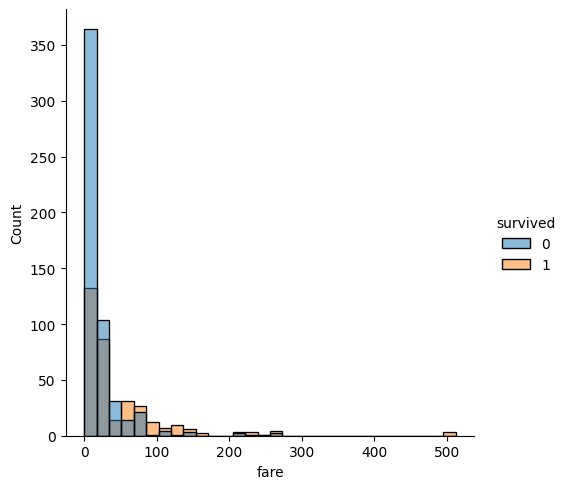

In [13]:
# limit x to 100
g = sns.displot(
    data=df,
    x='fare',
    hue='survived',
    bins=30,
)


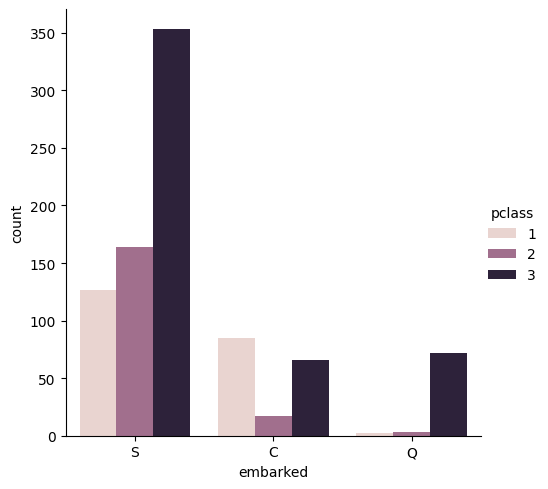

In [14]:
sns.catplot(
    data=df,
    x='embarked',
    kind='count',
    hue='pclass',
)

In [15]:
(df['class'].map({
    'First': 1,
    'Second': 2,
    'Third': 3,
}) == df['pclass']).all()

True

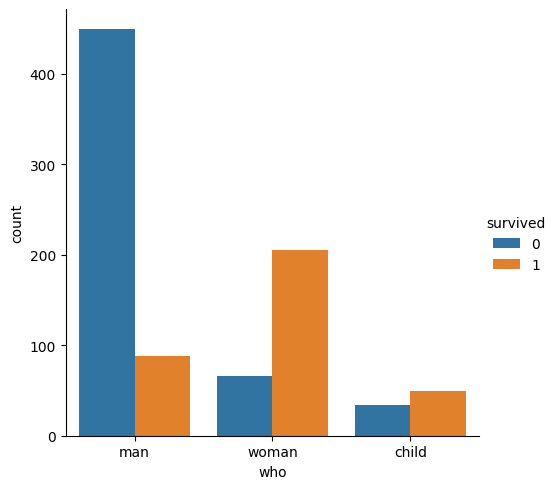

In [16]:
sns.catplot(
    data=df,
    x='who',
    kind='count',
    hue='survived',
)

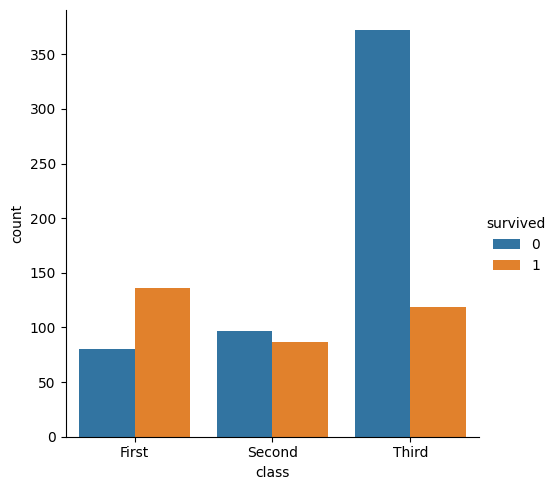

In [17]:
sns.catplot(
    data=df,
    x='class',
    kind='count',
    hue='survived',
)

In [18]:
df.isna().sum() / 891 * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [19]:
(df.alive.map({
    'yes': 1,
    'no': 0,
}) == df.survived).all()

True

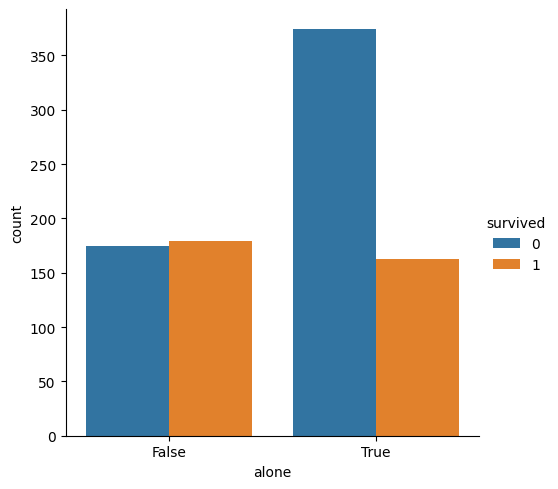

In [20]:
sns.catplot(
    data=df,
    x='alone',
    kind='count',
    hue='survived',
)

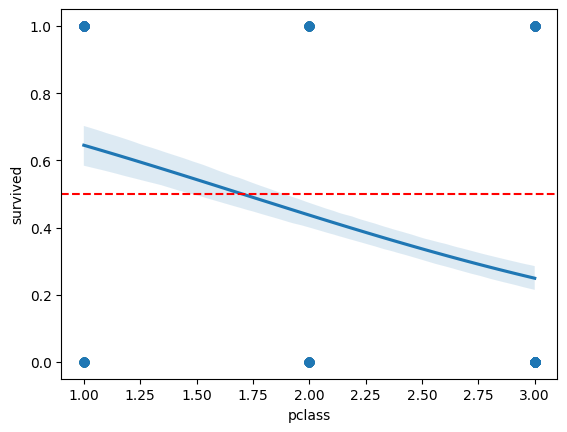

In [21]:
ax = sns.regplot(
    data=df,
    x='pclass',
    y='survived',
    logistic=True,
)
# add a reference line on 0.5
plt.axhline(0.5, color='r', linestyle='--')

In [22]:
df['alone'] = df['alone'].map({
    True: 1,
    False: 0
})
df['who'] = df['who'].map({
    'man': 1,
    'woman': 2,
    'child': 3,
})
df_numerical = df.select_dtypes(include=['int64', 'float64'])

<Axes: >

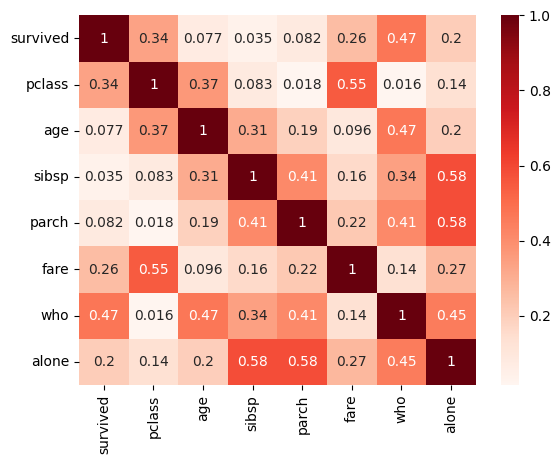

In [27]:
sns.heatmap(
    abs(df_numerical.corr()),
    annot=True,
    cmap='Reds',
)

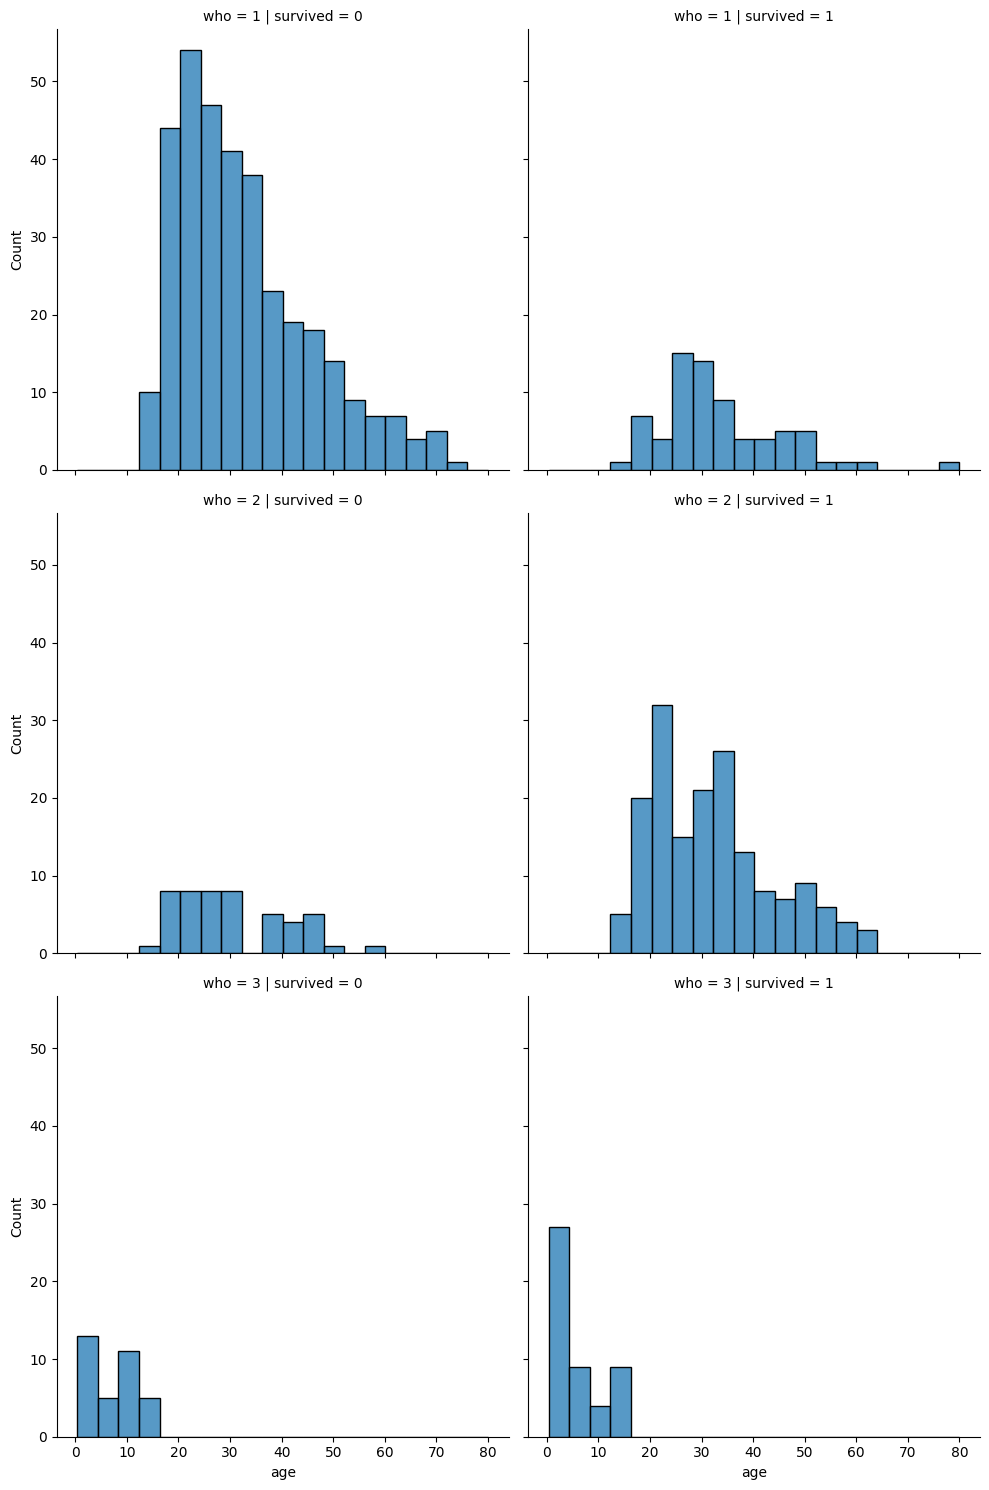

In [30]:
sns.displot(
    data=df,
    x='age',
    col='survived',
    row='who'
)

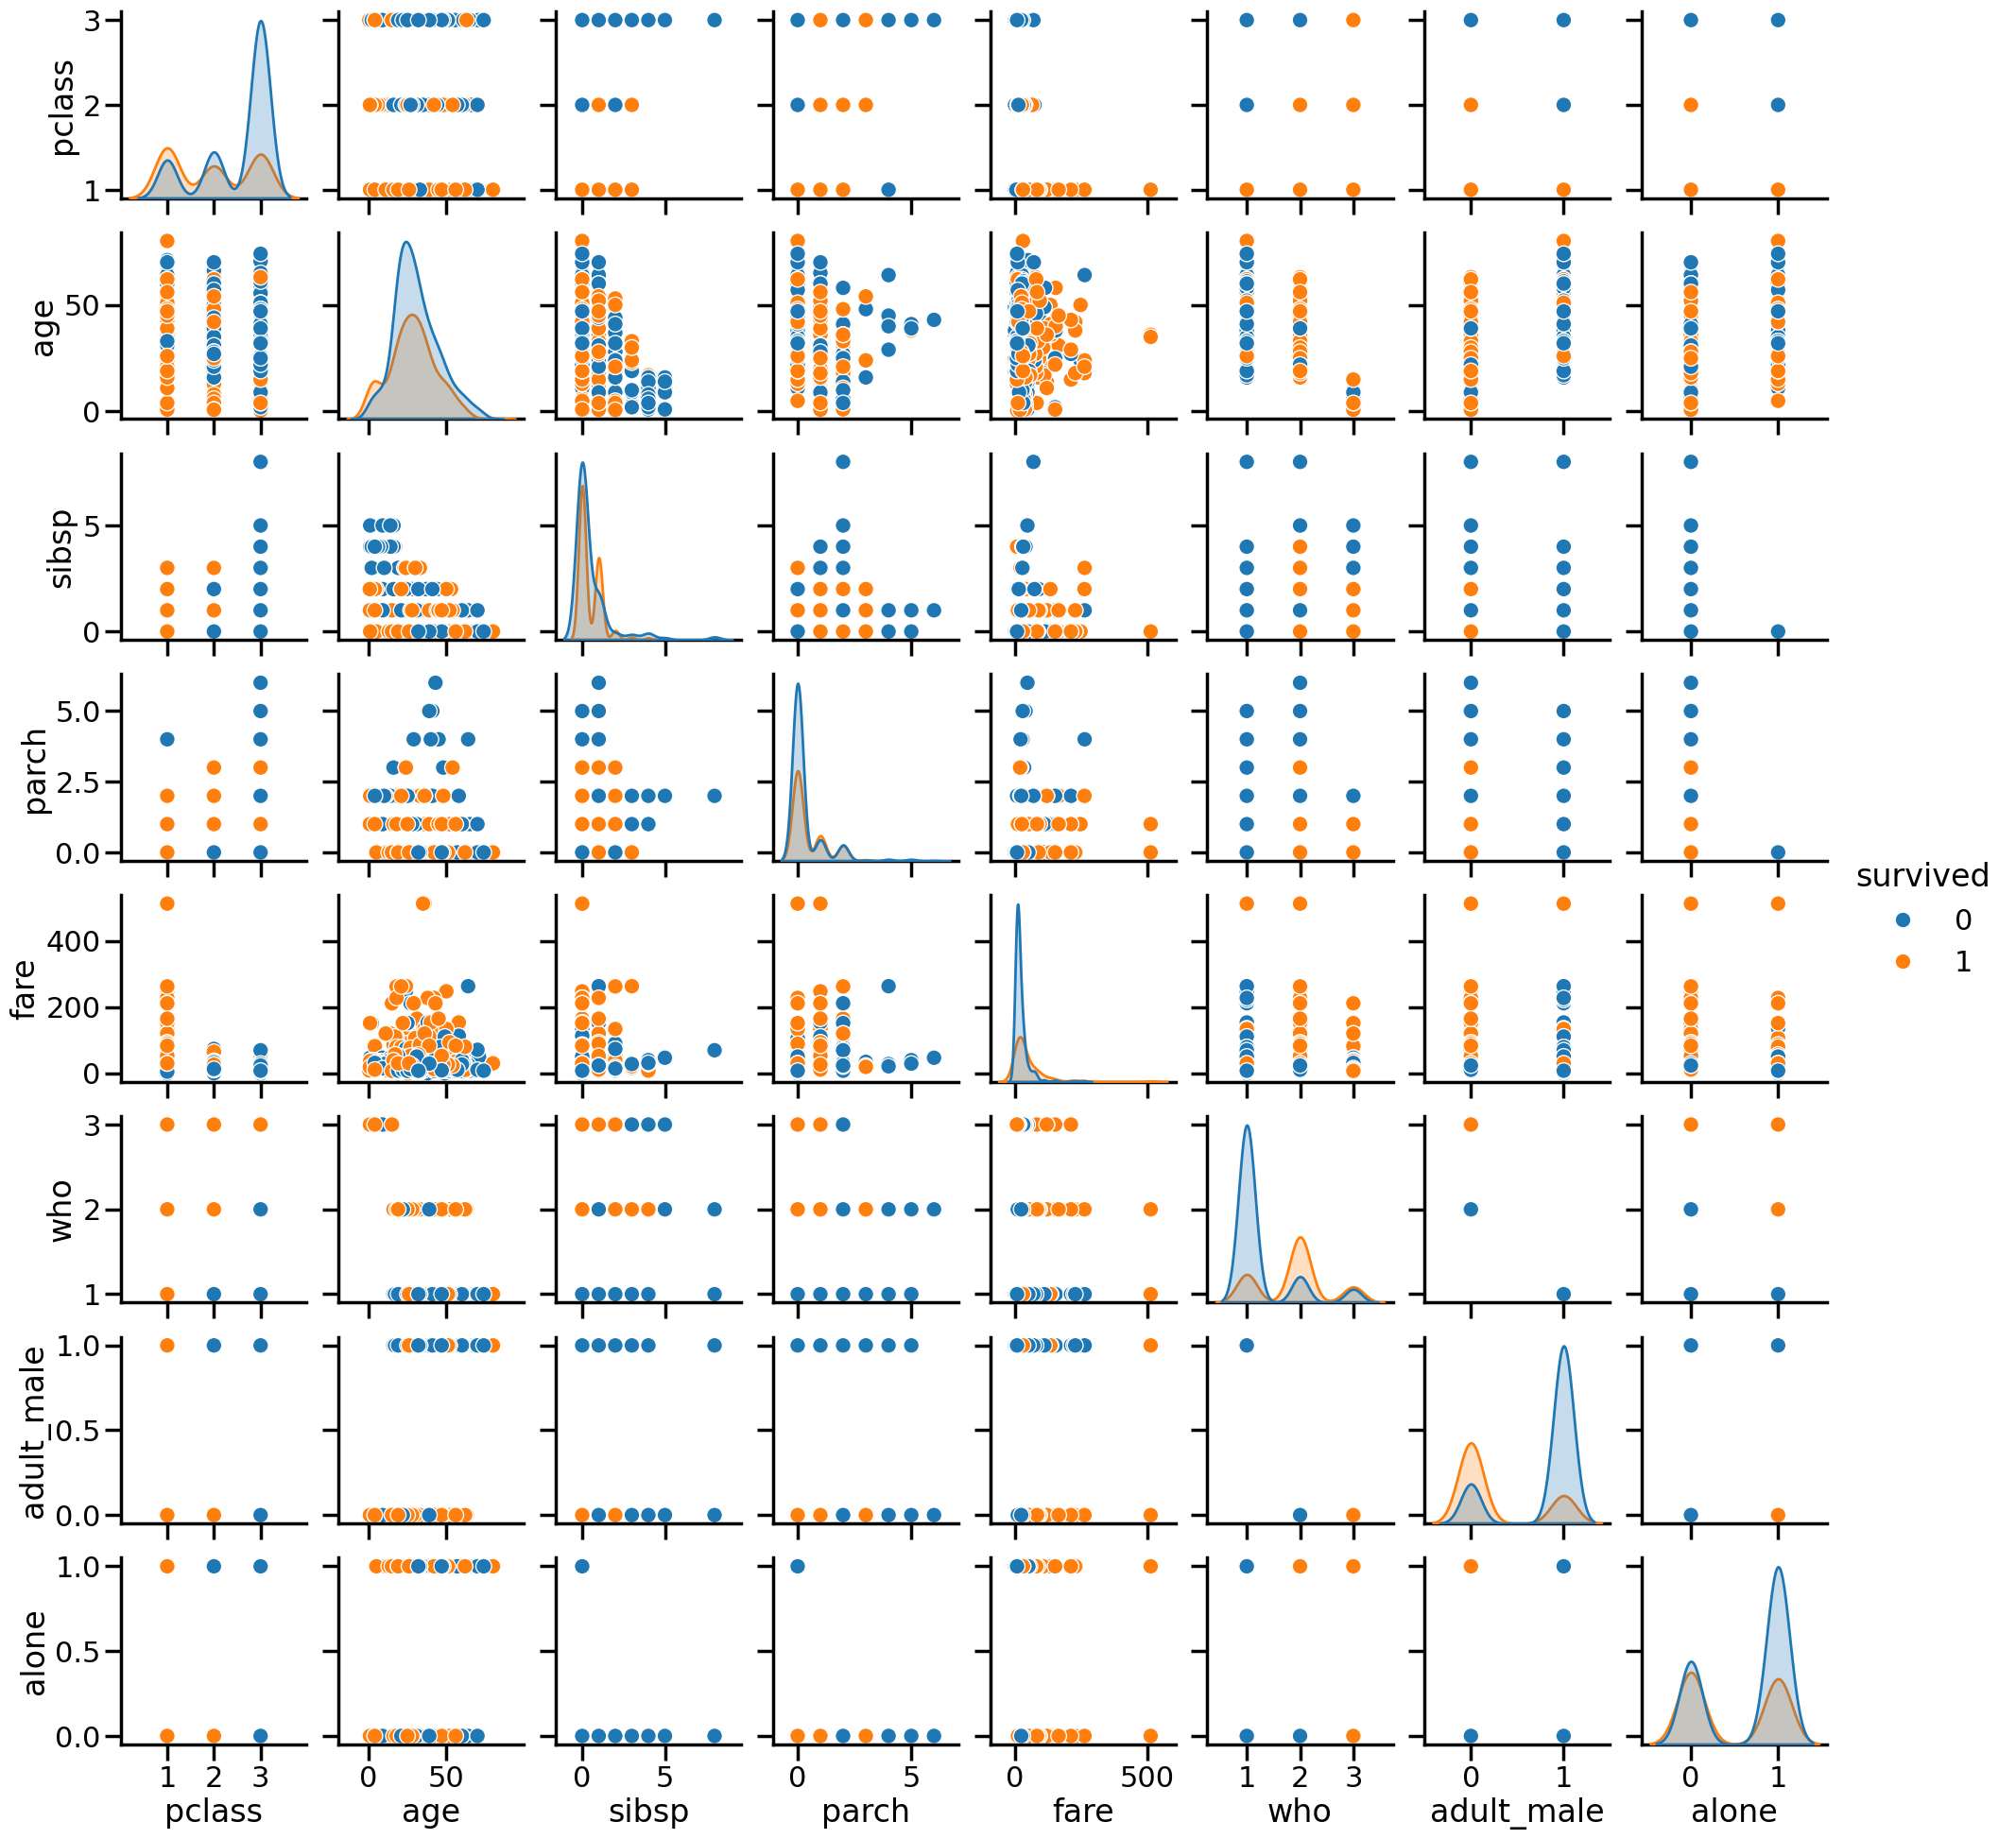

In [35]:
sns.set_context('poster')
sns.pairplot(df, hue='survived')

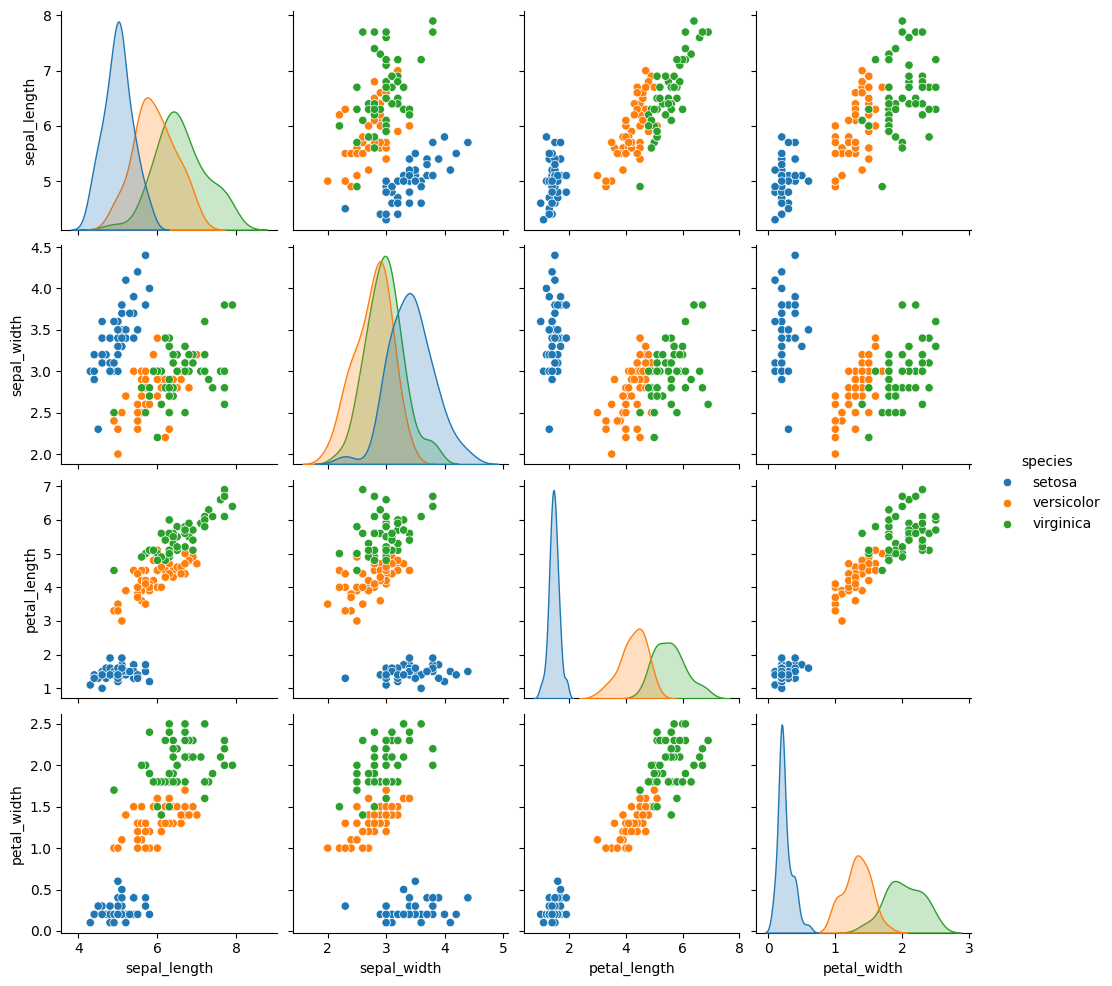

In [33]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')